<a href="https://colab.research.google.com/github/tina043c/ML/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
DIR_OUT = './'
batch_size = 128
num_classes = 10
epochs = 20


In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')



60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [8]:
model_name = 'CNN1'
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
__________________________________________________

In [0]:

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [0]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [11]:
train_history= model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 4ms/step - loss: 0.5406 - accuracy: 0.8551 - val_loss: 0.2287 - val_accuracy: 0.9333
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2312 - accuracy: 0.9318 - val_loss: 0.1682 - val_accuracy: 0.9507
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9484 - val_loss: 0.1325 - val_accuracy: 0.9613
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9602 - val_loss: 0.1137 - val_accuracy: 0.9657
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9666 - val_loss: 0.1031 - val_accuracy: 0.9674
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9729 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.0899 - val_accuracy: 0.9747
Epoch 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)


In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0703941211104393
Test accuracy: 0.9811000227928162


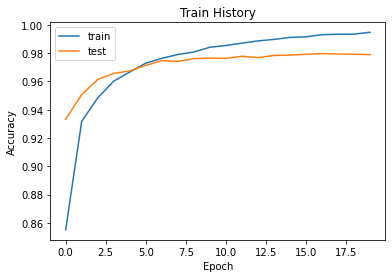

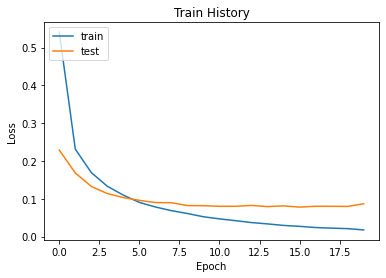

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def show_train_history(train_type, test_type):
# Get training and test loss histories
    plt.plot(train_history.history[train_type]) 
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'accuracy':
        plt.ylabel('Accuracy')
    else:
        plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [0]:
# Save Keras model
def savemodel(model, model_params_dir,name):
    json_string = model.to_json()
    # Save model architecture in JSON file
    open(model_params_dir + name + '_arch.json', 'w').write(json_string)
    # Save weights as HDF5
    model.save_weights(model_params_dir + name + '_weights.h5')
    print("Saved model to disk")

In [16]:
savemodel(model, DIR_OUT, model_name)

Saved model to disk


In [0]:
# Load Keras model
def loadmodel(model_params_dir,name): 
    # Load model architecture from JSON file
    model = keras.models.model_from_json(open(model_params_dir + name + '_arch.json').read())
    # Load model weights from HDF5 file
    model.load_weights(model_params_dir + name + '_weights.h5')
    print("Loaded model from disk")
    return model

In [0]:
# Load weights only
def loadmodelweights(model,model_params_dir,name_weightfile): 
    # Load model weights from HDF5 file
    model.load_weights(model_params_dir + name_weightfile+'.h5')
    print("Loaded model weights from disk")
    return model

In [19]:
loadmodelweights(model, DIR_OUT, model_name + '_weights')

Loaded model weights from disk
